# Pyber: Matplotlib Homework 
Data Science Bootcamp Spring 2018

Reminders: 
- You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
- When making your Bubble Plot, experiment with effects like alpha, edgecolor, and linewidths.
- When making your Pie Chart, experiment with effects like shadow, startangle, and explosion.

In [17]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
#Import data files 
city_data = "city_data.csv"
ride_data = "ride_data.csv"

# Read in with pandas 
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data) 
#ride_df.head()

#drop duplicate values 
city_df = city_df.drop_duplicates('city')
city_df.head() 

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [19]:
#merge two data frames
merge_data = pd.merge(city_df, ride_df, on="city")
merge_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [20]:
# Clean data of missing values 
merge_data = merge_data.dropna(how="any")
merge_data.count()

city            2375
driver_count    2375
type            2375
date            2375
fare            2375
ride_id         2375
dtype: int64

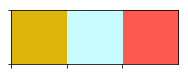

In [21]:
#set color scheme for charts and plots 
# gold dbb40c
# light sky blue c6fcff
# light coral ff6163
pyber_colors = ["gold", "light sky blue", "coral"]
sns.palplot(sns.xkcd_palette(pyber_colors))

# Bubble Plot of Pyber Data
Shows: 
- Average Fare ($) Per City
- Total Number of Rides Per City
- Total Number of Drivers Per City
- City Type (Urban, Suburban, Rural)

In [22]:
# Calculate values for the plot 
# Average fare grouped by city 
avg_fare = merge_data.groupby("city")["fare"].mean()
avg_fare

city
Alvarezhaven            23.928710
Alyssaberg              20.609615
Anitamouth              37.315556
Antoniomouth            23.625000
Aprilchester            21.981579
Arnoldview              25.106452
Campbellport            33.711333
Carrollbury             36.606000
Carrollfort             25.395517
Clarkstad               31.051667
Conwaymouth             34.591818
Davidtown               22.978095
Davistown               21.497200
East Cherylfurt         31.416154
East Douglas            26.169091
East Erin               24.478214
East Jenniferchester    32.599474
East Leslie             33.660909
East Stephen            39.053000
East Troybury           33.244286
Edwardsbury             26.876667
Erikport                30.043750
Eriktown                25.478947
Floresberg              32.310000
Fosterside              23.034583
Hernandezshire          32.002222
Horneland               21.482500
Jacksonfort             32.006667
Jacobfort               24.779355
Jasonfort

In [23]:
#total number of rides per city 
total_rides= merge_data.groupby("city")["date"].count()
total_rides

city
Alvarezhaven            31
Alyssaberg              26
Anitamouth               9
Antoniomouth            22
Aprilchester            19
Arnoldview              31
Campbellport            15
Carrollbury             10
Carrollfort             29
Clarkstad               12
Conwaymouth             11
Davidtown               21
Davistown               25
East Cherylfurt         13
East Douglas            22
East Erin               28
East Jenniferchester    19
East Leslie             11
East Stephen            10
East Troybury            7
Edwardsbury             27
Erikport                 8
Eriktown                19
Floresberg              10
Fosterside              24
Hernandezshire           9
Horneland                4
Jacksonfort              6
Jacobfort               31
Jasonfort               12
                        ..
South Roy               22
South Shannonborough    15
Spencertown             26
Stevensport              5
Stewartview             30
Swansonbury            

In [24]:
# Total Number of Drivers Per City
total_drivers = merge_data.groupby("city")["driver_count"].count()
total_drivers

city
Alvarezhaven            31
Alyssaberg              26
Anitamouth               9
Antoniomouth            22
Aprilchester            19
Arnoldview              31
Campbellport            15
Carrollbury             10
Carrollfort             29
Clarkstad               12
Conwaymouth             11
Davidtown               21
Davistown               25
East Cherylfurt         13
East Douglas            22
East Erin               28
East Jenniferchester    19
East Leslie             11
East Stephen            10
East Troybury            7
Edwardsbury             27
Erikport                 8
Eriktown                19
Floresberg              10
Fosterside              24
Hernandezshire           9
Horneland                4
Jacksonfort              6
Jacobfort               31
Jasonfort               12
                        ..
South Roy               22
South Shannonborough    15
Spencertown             26
Stevensport              5
Stewartview             30
Swansonbury            

In [25]:
# City Type (Urban, Suburban, Rural)
city_type = city_df.set_index('city')['type']
city_type.value_counts()

Urban       66
Suburban    41
Rural       18
Name: type, dtype: int64

In [26]:
#Create new dataframe with results 
pyber_cities = pd.DataFrame({"Average Fare per City": avg_fare,
                            "Total Rides": total_rides,
                            "Total Drivers": total_drivers,
                            "City Type": city_type})
pyber_cities.head()

,Average Fare per City,City Type,Total Drivers,Total Rides
Alvarezhaven,23.928710,Urban,31,31
Alyssaberg,20.609615,Urban,26,26
Anitamouth,37.315556,Suburban,9,9
Antoniomouth,23.625000,Urban,22,22
Aprilchester,21.981579,Urban,19,19


In [27]:
# Create separate dataframes for city types 
urban = pyber_cities.loc[pyber_cities["City Type"]== "Urban"]
suburban = pyber_cities.loc[pyber_cities["City Type"]== "Suburban"]
rural = pyber_cities.loc[pyber_cities["City Type"]== "Rural"]

Current size: [8.0, 6.0]


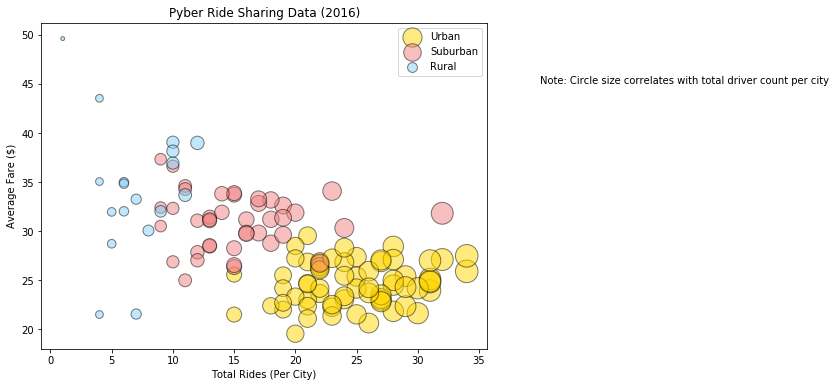

In [40]:
# Create scatter plots for each city type 
plt.scatter(urban["Total Rides"], urban["Average Fare per City"], marker="o", color="gold", edgecolors="black",
            s=urban["Total Drivers"]*15, label = "Urban", alpha=0.5, linewidth=1)

plt.scatter(suburban["Total Rides"], suburban["Average Fare per City"], marker="o", color="lightcoral", edgecolors="black",
            s=suburban["Total Drivers"]*15, label = "Suburban", alpha=0.5, linewidth=1)

plt.scatter(rural["Total Rides"], rural["Average Fare per City"], marker="o", color="lightskyblue", edgecolors="black",
            s=rural["Total Drivers"]*15, label = "Rural", alpha=0.5, linewidth=1)

#Add title and axis labels to 
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Rides (Per City)")
plt.ylabel("Average Fare ($)")

#Note about circle size
plt.text(40, 45, "Note: Circle size correlates with total driver count per city")

#add legend 
plt.legend(loc="best")

#Change figure size
# Get current size
fig_size = plt.rcParams["figure.figsize"]
print("Current size:", fig_size)
#prints Current size: [6.0, 4.0]
 
#Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

# Pie Charts 
Produce the following three pie charts:
- % of Total Fares by City Type
- % of Total Rides by City Type
- % of Total Drivers by City Type

In [35]:
# Total fares by city type 
city_fare_pie = merge_data.groupby(["type"])["fare"].sum()
city_fare_pie

type
Rural        4255.09
Suburban    19317.88
Urban       40078.34
Name: fare, dtype: float64

In [36]:
# Use the city pie index to label pie slices 
city_fare_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

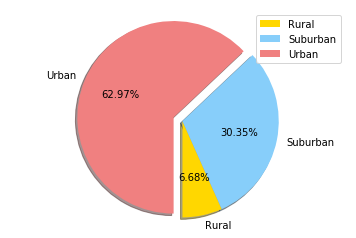

In [38]:
#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

# Explode pie slice 
explode = (0,0, 0.1)

# Create pie chart for total fares by city type 
plt.pie(city_fare_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 270)

# Add legend 
plt.legend(loc="upper right")

#set equal axis 
plt.axis("equal")

#plot chart 
plt.show()

In [39]:
#Total rides by city type.

city_rides_pie = merge_data.groupby(["type"])["ride_id"].count()
city_rides_pie

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

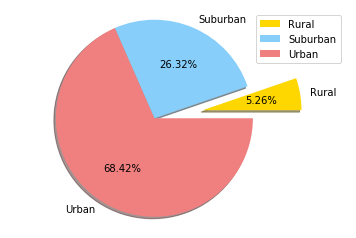

In [40]:
# Create index for slice labels 
city_rides_pie.index

#Explode the first section 
explode = (0.5,0,0)

#Create the pie chart.
plt.pie(city_rides_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True)

#Tell Matplotlib that we wnat the pie chart to have equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "upper right")

#Show the chart.
plt.show()

In [42]:
# Total drive count by city  
city_drivers_pie = merge_data.groupby(["type"])["driver_count"].mean()
city_drivers_pie

type
Rural        5.816000
Suburban    15.414400
Urban       39.692923
Name: driver_count, dtype: float64

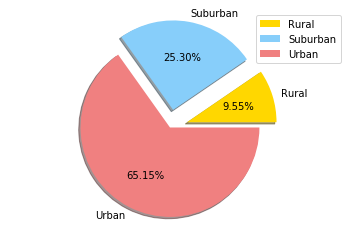

In [43]:
# City pie index for labels 
city_drivers_pie.index

#explode first and second segments of the pie 
explode = (0.2, 0.2, 0)

#Create the pie chart 
plt.pie(city_drivers_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True)

#set equal axis 
plt.axis("equal")

#add the legend 
plt.legend(loc = "upper right")

# show the pie chart 
plt.show()

# Pyber Data Trends
There is a higher volume of business in urban markets. Urban areas have the highest number of rides, highest number of drivers, and the lowest average fare among the three geographic area types. Further, urban cities also have a higher percentage of the total fares at 63 percent. Conversely, rural areas have less of the market share and higher average fares with rural areas owning the smallest share of the fares at 7 percent. These fare differences may be due to the differences in supply and demand seen in urban vs. rural areas. It's possible urban areas and their larger populations are likely to have more people without cars and thereby may be more to rely on ridesharing to get around.  